# Data Sources

### Zhentao Shi

<!-- code is tested on SCRP -->

kernel: base (python 3.11.3)

* Online archives
* API (Application Programming Interface)
* Proprietary data
* Survey data

## Public data

* Time Series
  - Natural ordering of observations
  - A single realization in history
  - eg. GDP, stock prices

* Microeconomic data
  - No natural ordering
  - Collected at the same time, or time does not matter
  - [Auction data](https://capcp.la.psu.edu/data-and-software/alaska-oil-and-gas-auction-data/)

* Aggregate panel data
  - [Penn World Table](https://www.rug.nl/ggdc/productivity/pwt/?lang=en)
  - [Atlas Trade Data](https://atlas.cid.harvard.edu/about-data)
  - [IMF databases](https://data.imf.org/?sk=388DFA60-1D26-4ADE-B505-A05A558D9A42&sId=1479329132316)

## Gated Data

* Applications needed
  * Chinese Longitudinal Healthy Longevity Survey [link](https://www.icpsr.umich.edu/web/NACDA/studies/36692)
  * China Household Finance Survey [link](https://chfs.swufe.edu.cn/)


## CUHK Library

* [Refinitiv](http://easyaccess1.lib.cuhk.edu.hk/limited/refinitiv.html)
* [WRDS](http://easyaccess1.lib.cuhk.edu.hk/limited/wrds.htm)
* [CEIC](https://cas-ceicdata-com.easyaccess1.lib.cuhk.edu.hk/login#)


## Econ Department

* WIND
* CEIC
* Bloomberg
* China Census

## Time Series

- Macroeconomics
  - 国家统计局 [National Bureau of Statistics](https://data.stats.gov.cn/easyquery.htm?cn=B01)
  - Federal Reserve [FRED database](https://research.stlouisfed.org/econ/mccracken/fred-databases/)
- Financial
  - [Yahoo Finance](https://finance.yahoo.com/)

## HK GDP

* [Census and Statistics Department](https://www.censtatd.gov.hk/en/web_table.html?id=33#)
  * Webpage With API

In [1]:
import requests
import pandas as pd
import json

url = "https://www.censtatd.gov.hk/api/get.php?id=310-31003&lang=en&param=N4KABGBEDGBukC4yghSBxAIgBQPoGEB5AWW0IDkBRcgFUTAG1xU0AxTSAGmZckw+4s02fJS49UGUeKFQsrfKxlDI+AJIA1ZbwAa6AMrbJxA0bR6zUHYcEqTlyMUMSAuswC+tyAGd4SFJJE5PRMspAASgCGAO64xLgAFgDWACa4KQ4AmgD2mbgAjCkADrgApLjekK4eXkUApgBOAJbZGf4SPgAukQ2d9JAATAAMA-lD+VUQnsyQTW1QAMxjALRLQ0MLypAANpEAdgDm-XV7Ve5AA"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['dataSet'])

## Federal Reserve

* China GDP [[link](https://fred.stlouisfed.org/series/MKTGDPCNA646NWDB)]

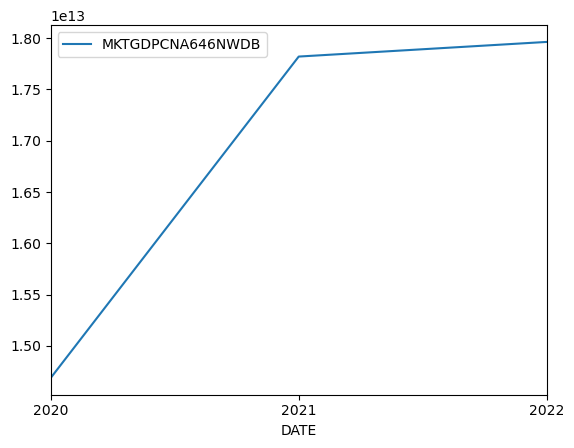

In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

data = pdr.get_data_fred('MKTGDPCNA646NWDB')
data.plot()
plt.show()


Another example: [Quarterly US Industrial Production Index](https://fred.stlouisfed.org/series/IPB50001SQ)


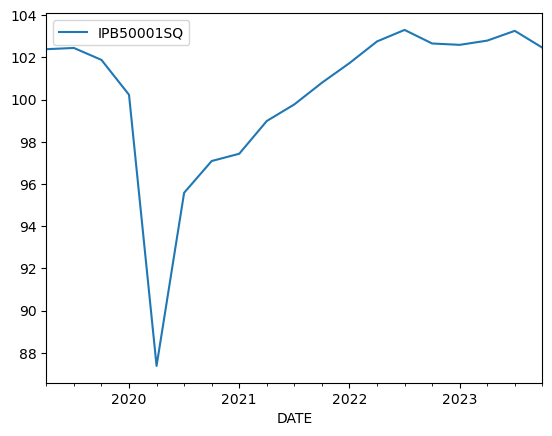

In [3]:
data = pdr.get_data_fred('IPB50001SQ')
data.plot()
plt.show()


## Finance Data


* [Yahoo Finance](https://finance.yahoo.com/)

* Tick `AAPL` for *Apple Inc.* 
  * Package `quantmod`

c:\Users\zhent\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   
2024-01-22  192.300003  195.330002  192.259995  193.889999  193.889999   
2024-01-23  195.020004  195.750000  193.830002  195.179993  195.179993   
2024-01-24  195.419998  196.380005  194.339996  194.500000  194.500000   

              Volume  
Date                  
2024-01-18  78005800  
2024-01-19  68741000  
2024-01-22  60133900  
2024-01-23  42355600  
2024-01-24  53578100  


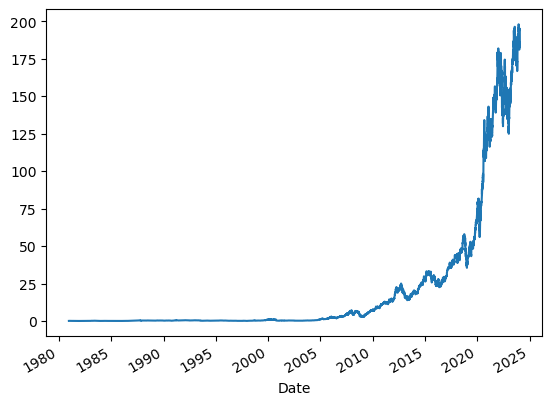

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('AAPL')
print(data.tail())
data['Close'].plot()
plt.show()

### Shanghai Composite Index

[*********************100%%**********************]  1 of 1 completed


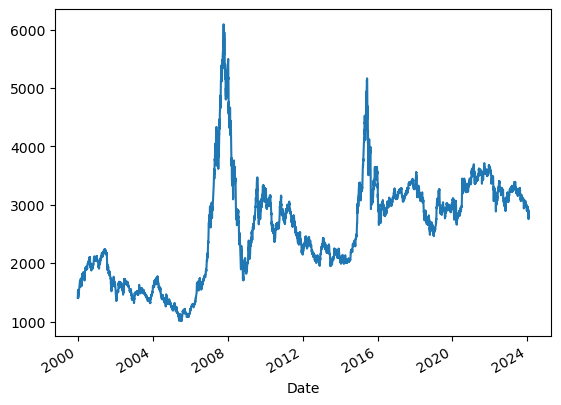

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download("000001.SS", start='2000-01-01')
data['Close'].plot()
plt.show()

### 000001.SS Return

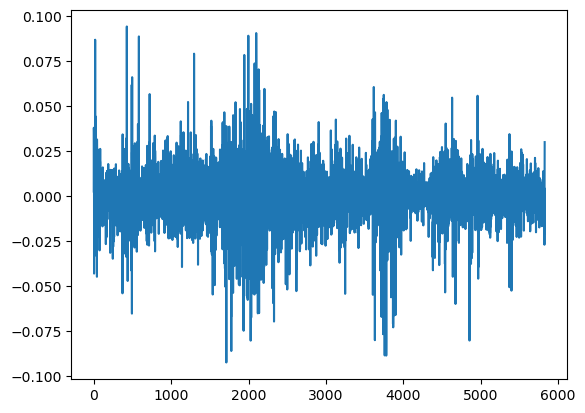

In [9]:
import numpy as np
import matplotlib.pyplot as plt

SH = data['Close']
SH_diff = np.diff(np.log(SH))

plt.plot(SH_diff)
plt.show()

### Cryptocurrencies

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


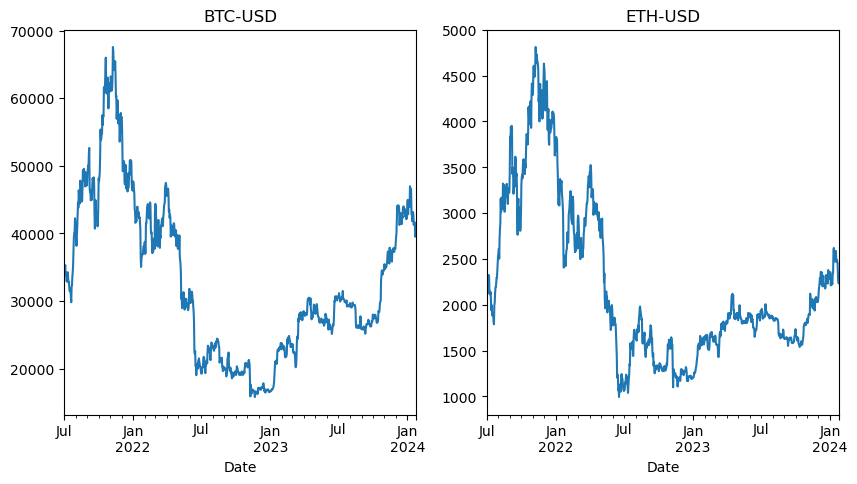

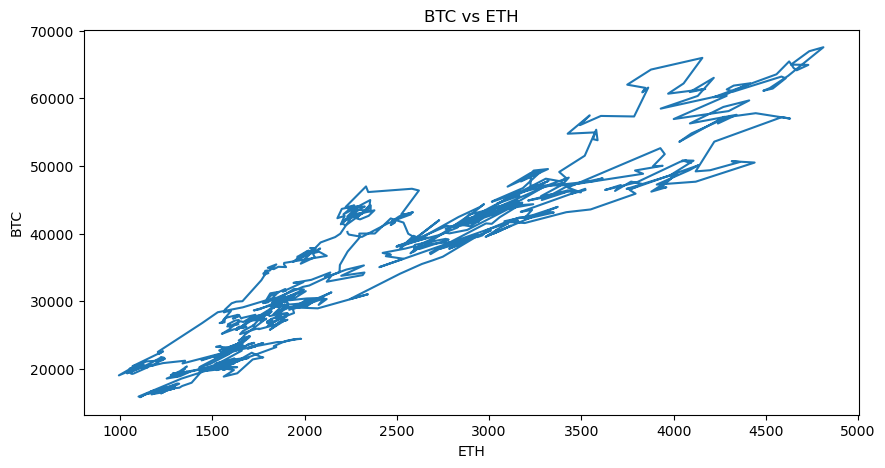

In [10]:
BTC = yf.download('BTC-USD', start='2021-07-01')['Close']
ETH = yf.download('ETH-USD', start='2021-07-01')['Close']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
BTC.plot()
plt.title('BTC-USD')

plt.subplot(1, 2, 2)
ETH.plot()
plt.title('ETH-USD')

plt.figure(figsize=(10, 5))
plt.plot(ETH.values, BTC.values)
plt.xlabel('ETH')
plt.ylabel('BTC')
plt.title('BTC vs ETH')
plt.show()

### Bitcoin return

In [ ]:
diff( log(BTC) ) %>% plot( )

## Repeated Data Download

* Example: HKMA [API](https://apidocs.hkma.gov.hk/documentation/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity/)
  * Save as a csv file
  * Repeat the regular job via `cron` in Linux
  * `cronR` provides an R interface to `cron`

In [11]:
import requests
import pandas as pd
import json

url = "https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity"
response = requests.get(url)
data = response.json()

hkma = pd.DataFrame(data['result'])
hkma.to_csv('hkma.csv', index=False)

## Access Database

* API for CEIC

### Bank Marketing Data


* Direct marketing campaigns of a Portuguese banking institution. 


* S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.


*  **Data Import**: `readr::read_delim`

In [12]:
import pandas as pd

# Read the CSV file
d0 = pd.read_csv('data_example/bank-full.csv', delimiter=';', 
                 dtype={'age': int, 'job': str, 'marital': 'category', 'education': 'category', 'balance': int})

# Display the first few rows
print(d0.head())

# Display the column names
print(d0.columns)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 

## Data Transformation

* `filter`: pick out a subset of rows that satisfy some conditions
* `select`: pick out a subset of columns
* `arrange`: order rows. Default order from low to high
* `mutate`: add columns produced by the existing ones

In [13]:
# Select columns
d1 = d0.loc[:, 'age':'loan']

# Display the first few rows
print(d1.head())

   age           job  marital  education default  balance housing loan
0   58    management  married   tertiary      no     2143     yes   no
1   44    technician   single  secondary      no       29     yes   no
2   33  entrepreneur  married  secondary      no        2     yes  yes
3   47   blue-collar  married    unknown      no     1506     yes   no
4   33       unknown   single    unknown      no        1      no   no


In [14]:
# Select a subset by conditions
d1_blue_collar_over_50 = d1[(d1['job'] == 'blue-collar') & (d1['age'] > 50)]
d1_blue_collar_20_to_30 = d1[(d1['job'] == 'blue-collar') & (d1['age'] > 20) & (d1['age'] <= 30)]

In [15]:
# (re)arrange rows
d1_sorted_asc = d1.sort_values(['age', 'education'])
d1_sorted_desc = d1.sort_values(['age', 'education'], ascending=[False, True])

In [ ]:
# Add generated columns (last column)
d1['edu_f'] = pd.to_numeric(d1['education'], errors='coerce')

In [ ]:
# Create new dataframe with specified columns
d1_transmuted = d1[['age', 'marital', 'education']].copy()
d1_transmuted['marital'] = pd.to_numeric(d1_transmuted['marital'], errors='coerce')
d1_transmuted['education'] = pd.to_numeric(d1_transmuted['education'], errors='coerce')

## Summarize

* `group_by`

In [16]:
# Overall mean balance
mean_b = d1['balance'].mean()
print(f'Mean Balance: {mean_b}')

Mean Balance: 1362.2720576850766


In [17]:
# Mean balance by groups
mean_balance_by_education = d1.groupby('education')['balance'].mean()
print(mean_balance_by_education)

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64


In [18]:
# Mean, standard deviation and count by groups
grouped = d1.groupby(['education', 'marital'])
summary = grouped['balance'].agg(['mean', 'std', 'count'])
summary.columns = ['mean_b', 'sd_b', 'count']
print(summary)

                         mean_b         sd_b  count
education marital                                  
primary   divorced  1137.680851  2429.939497    752
          married   1286.655547  2760.065804   5246
          single    1131.215709  2464.671938    853
secondary divorced   902.772647  2082.642267   2815
          married   1251.750254  2756.505779  13770
          single    1060.546773  2288.491922   6617
tertiary  divorced  1700.917063  4252.286797   1471
          married   1848.779341  3937.521135   7038
          single    1643.351210  3545.187122   4792
unknown   divorced  1417.147929  2096.269137    169
          married   1557.787931  3348.602718   1160
          single    1493.657197  2987.710066    528


## Data Scrapping

* [Liangjia Shenzhen data](https://github.com/zhentaoshi/econ_data_science/blob/master/data_example/Scrape_Lianjia.ipynb) (by Wang Yishu)
* We can test it on SCRP.

## Reading

* Wickham and Grolemund](https://r4ds.had.co.nz/)
  * Ch.10: tibbles
  * Ch.11: data import
  * Ch.5:  data transformation
  * Ch.18: pipes
